https://www.kaggle.com/sagnik1511/flower-recognition-93-accuracy-with-neural-nets

# Importing required libraries

In [1]:
# !pip install mlxtend

In [2]:
# main libraries
import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
print('version of tensorflow :',tf.__version__)

# supporting libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import os
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.image as mpimg

# for confusion matrix plotting
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix

version of tensorflow : 2.4.0


# Gathering file paths

In [3]:
link='tobacco_small/tastes/'

In [4]:
import os

list_dir = []
for file in os.listdir(link):
    list_dir.append(link+file)
#     print(link+file)

In [5]:
list_dir

['tobacco_small/tastes/must_have_apple_drops',
 'tobacco_small/tastes/must_have_pinkman',
 'tobacco_small/tastes/must_have_sea_buckthorn_tea',
 'tobacco_small/tastes/nord_wind_feijoa',
 'tobacco_small/tastes/nord_wind_free_apricot',
 'tobacco_small/tastes/nord_wind_grapefruit']

tobacco_small/tastes/must_have_apple_drops/IMG_9147.jpg


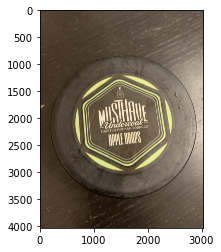

tobacco_small/tastes/must_have_apple_drops/IMG_9148.jpg


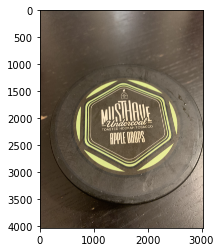

tobacco_small/tastes/must_have_apple_drops/IMG_9149.jpg


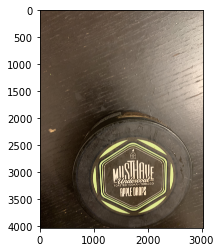

In [6]:
k=0
for fil in os.listdir(list_dir[0] + '/'):
    link=list_dir[0] + '/' + fil
    print(link)
    img = mpimg.imread(link)
    plt.imshow(img)
    plt.show()
    k+=1
    if k==3:
        break

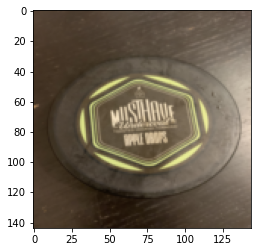

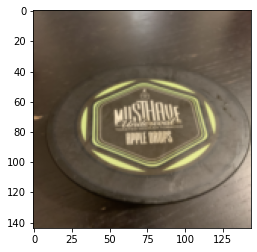

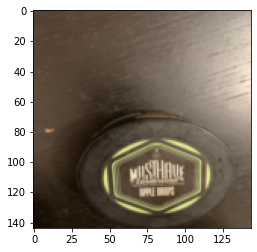

Wall time: 23.1 s


In [7]:
%%time
k = 0
for fil in os.listdir(list_dir[0] + '/'):
    link = list_dir[0] + '/' + fil
    img = mpimg.imread(link)
    size = 48 * 3
    img = resize(img, (size, size, 3), anti_aliasing=True)
    plt.imshow(img)
    plt.show()
    k += 1
    if k == 3:
        break

# Dataframe Generation

In [25]:
def create_dataframe(path, arr, label):
    """
    Создание датафрейма из файлов
    path: путь к папке
    arr: пустой список
    label: метка
    """
    for fil in os.listdir(path):
        link = path + '/' + fil
        if link[-3:] == 'pyc' or link[-2:] == 'py':
            continue
        img = mpimg.imread(link)
        size = 48 * 3
        img = resize(img, (size, size, 3), anti_aliasing=True)
        img = img.reshape(size * size * 3)
        arr.append(img)
    xx = np.ones(len(arr)) * label
    arr = pd.DataFrame(arr)
    xx = pd.DataFrame({'label': xx})
    arr = pd.concat([xx, arr], axis=1)
    return arr

In [27]:
# path = list_dir[1]
# links = []
# for fil in os.listdir(path):
#     link = path + '/' + fil
#     links.append(link)

# display(len(links), links[:4])

In [47]:
# %%time

# counter = 0
# for i in tastes:
#     print(i, counter)
#     i = create_dataframe(path=list_dir[counter], arr=[], label=counter)
#     counter += 1
#     print(i.shape)
# #     display(i.head(3))

In [28]:
tastes = [taste.split('/')[-1] for taste in list_dir]
tastes

['must_have_apple_drops',
 'must_have_pinkman',
 'must_have_sea_buckthorn_tea',
 'nord_wind_feijoa',
 'nord_wind_free_apricot',
 'nord_wind_grapefruit']

In [60]:
def create_dataframe_2(df, label):
    df = create_dataframe(list_dir[label], df, label)
    print(df.shape)
    return df

In [62]:
%%time

must_have_apple_drops, must_have_pinkman, must_have_sea_buckthorn_tea = [], [], []
nord_wind_feijoa, nord_wind_free_apricot, nord_wind_grapefruit = [], [], []

must_have_apple_drops = create_dataframe_2(df=must_have_apple_drops, label=0)
must_have_pinkman = create_dataframe_2(df=must_have_pinkman, label=1)
must_have_sea_buckthorn_tea = create_dataframe_2(
    df=must_have_sea_buckthorn_tea, label=2)
nord_wind_feijoa = create_dataframe_2(df=nord_wind_feijoa, label=3)
nord_wind_free_apricot = created_dataframe_2(df=nord_wind_free_apricot,
                                             label=4)
nord_wind_grapefruit = create_dataframe_2(df=nord_wind_grapefruit, label=5)

(51, 62209)
(40, 62209)
(43, 62209)
(15, 62209)


NameError: name 'created_dataframe_2' is not defined

In [63]:
# %%time

# must_have_apple_drops = []
# must_have_apple_drops = create_dataframe(list_dir[0], must_have_apple_drops, 0)
# print(must_have_apple_drops.shape)

# must_have = []
# must_have = create_dataframe(list_dir[1], must_have, 1)
# print(must_have.shape)

# nord_wind = []
# nord_wind = create_dataframe(list_dir[2], nord_wind, 2)
# print(nord_wind.shape)

# tobacco_x = []
# tobacco_x = create_dataframe(list_dir[3], tobacco_x, 3)
# print(tobacco_x.shape)

In [64]:
# len(darkside),len(must_have),len(nord_wind),len(tobacco_x)

In [65]:
# len(darkside) + len(must_have) + len(nord_wind) + len(tobacco_x)

In [66]:
# tobacco_x.head(3)

Теперь мы можем напрямую объединить эти 5 фреймов данных, а затем разделить их на 2 фрейма данных для обучения и тестирования. Но поскольку у нас есть разное количество атрибутов во фреймах, мы в конечном итоге создадим несбалансированные фреймы данных, что приведет к плохому прогнозу. 

Итак, мы разделяем различные фреймы данных цветов на тестовое разделение на 80-20 поездов, а затем добавляем их в тренировочный и тестовый фрейм данных, после чего перетасовываем данные и создаем окончательные данные для прогнозирования.

In [67]:
tastes

['must_have_apple_drops',
 'must_have_pinkman',
 'must_have_sea_buckthorn_tea',
 'nord_wind_feijoa',
 'nord_wind_free_apricot',
 'nord_wind_grapefruit']

In [68]:
nord_wind_grapefruit

[]

In [69]:
tr1 = must_have_apple_drops.drop('label', 1)
ts1 = must_have_apple_drops['label']

X_train, X_test, y_train, y_test = train_test_split(tr1,ts1,test_size=0.2,random_state=0)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

tr1 = must_have_pinkman.drop('label', 1)
ts1 = must_have_pinkman['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
X_train = pd.concat([X_train, x], axis=0)
X_test = pd.concat([X_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = must_have_sea_buckthorn_tea.drop('label', 1)
ts1 = must_have_sea_buckthorn_tea['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
X_train = pd.concat([X_train, x], axis=0)
X_test = pd.concat([X_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = nord_wind_feijoa.drop('label', 1)
ts1 = nord_wind_feijoa['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
X_train = pd.concat([X_train, x], axis=0)
X_test = pd.concat([X_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = nord_wind_free_apricot.drop('label', 1)
ts1 = nord_wind_free_apricot['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
X_train = pd.concat([X_train, x], axis=0)
X_test = pd.concat([X_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

tr1 = nord_wind_grapefruit.drop('label', 1)
ts1 = nord_wind_grapefruit['label']
x, xx, y, yy = train_test_split(tr1, ts1, test_size=0.2, random_state=0)
X_train = pd.concat([X_train, x], axis=0)
X_test = pd.concat([X_test, xx], axis=0)
y = pd.DataFrame(y)
yy = pd.DataFrame(yy)
y_train = pd.concat([y_train, y], axis=0)
y_test = pd.concat([y_test, yy], axis=0)

AttributeError: 'list' object has no attribute 'drop'

In [ ]:
plt.title('train images')
plt.pie(y_train['label'].value_counts().values, labels=tastes)
plt.show()

plt.title('test images')
plt.pie(y_test['label'].value_counts().values, labels=tastes)
plt.show()

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
X_train, y_train = X, y

In [ ]:
# X_train.info()

Теперь мы собираемся проверить количество цветов в трейне и протестировать.

In [21]:
# flowers=['AFTER_8', 'Al_Fakher_Apple', 'Al_Fakher_Arena_Black', 'Al_Fakher_multi']

In [ ]:
plt.title('train images')
plt.pie(y_train['label'].value_counts().values, labels=tastes)
plt.show()

# Train & Test Data Generation

## 0
Теперь нам нужно разделить данные на обучение и тестирование, и после этого мы собираемся разделить целевые значения из фреймов данных.

In [ ]:
train=pd.concat([y_train,X_train],axis=1)
test=pd.concat([y_test,X_test],axis=1)

После получения данных поезда и тестирования мы перемешиваем данные, что приведет к уничтожению ненужных шаблонов.

In [ ]:
train=train.sample(frac=1)
test=test.sample(frac=1)

In [ ]:
train.head(3)

## X and Y preparation
Сейчас мы готовим X_train, y_train, X_test и y_test, которые будут загружены после некоторых процессов.

In [ ]:
X_train=train.drop('label',1)
y_train=train['label']
X_test=test.drop('label',1)
y_test=test['label']

In [ ]:
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()

In [ ]:
y_train=y_train.astype('int64')
y_test=y_test.astype('int64')

Поскольку мы должны найти ответы для обычных людей, мы также используем массив цветов в качестве декодера, так как название цветов было закодировано.

In [ ]:
decoder=tastes
decoder

Поскольку изображения сглаживаются, мы должны изменить их форму для визуализации.

In [ ]:
for i in range(3):
    #print('Type of flower :',decoder[y_train[i]])
    plt.title('Name of the flower : ' + decoder[y_train[i]])
    plt.imshow(X_train[i].reshape(48, 48, 3))
    plt.show()

In [ ]:
X_train.shape,X_test.shape

## Reshaping
Теперь мы изменяем форму трейна и теста, поскольку собираемся вводить данные в сверточные нейронные сети.

In [ ]:
print(size)

X_train = X_train.reshape(X_train.shape[0], size, size, 3)
X_test = X_test.reshape(X_test.shape[0], size, size, 3)
y_train = y_train.reshape(X_train.shape[0], 1)
y_test = y_test.reshape(X_test.shape[0], 1)

Это изменение формы данных привело к созданию четырехмерного набора данных. Когда он будет встроен в нейронную сеть, он преобразуется в 4-мерные тензоры, которые будут определять прогноз.

# Model Generation
Генерация модели: По мере создания данных мы собираемся построить нашу модель. Есть несколько очень популярных моделей классификации изображений, например
- Inception V3 
- ResNet 
- MobileNet. 

Но здесь мы собираемся создать нашу собственную модель, потому что она должна быть привычкой любого изучающего DL или профессионала DL. Наша модель будет иметь несколько уровней Dense и ConvNet в последовательной структуре.

In [ ]:
model = Sequential()

model.add(Conv2D(64, activation='relu', kernel_size=(3, 3), input_shape=X_train[0].shape))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

После создания модели давайте посмотрим на краткое изложение модели.

In [ ]:
model.summary()

Now we are compiling our model with custom metrics .

We are using:
1. Optimizer ---> Adam (default)
2. Loss ---> Sparse Categorical Crossentropy
3. Metrics ---> Accuracy

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

И вот мы подошли к самой интересной части всего нашего проекта - **MODEL FITTING**. Мы собираемся объявить размер батча равным 10, что будет соответствовать точности модели и времени. Мы используем 7 эпох для обучения модели, и мы используем тестовые данные в качестве проверки, и, в конце концов, мы также добавляем подробности, так как мы можем видеть, как развивается модель NN. Мы собираемся сохранить эту подгонку в переменной `hist`, чтобы мы могли видеть, как работает модель, и определять, переообучается ли модель или недостаточно, имеет ли она очень большое смещение или нет.

In [ ]:
%%time
hist=model.fit(X_train,y_train,batch_size=10,epochs=7,verbose=1,validation_data=(X_test,y_test))

Теперь проверяем работоспособность моделей путем построения графиков.

In [ ]:
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

После визуализации графика мы можем сказать, что модель лучше всего настраивается между 2-й и 3-ей эпохами, тогда модель начинает переобучаться данными трейна. Таким образом, оптимально настроенная модель дает 60% точности по сравнению с данными валида. Теперь мы собираемся спрогнозировать тестовые данные, составить confusion matrix и сделать выводы.

In [ ]:
y_pred = model.predict(X_test)
type(y_pred)

In [ ]:
y_final = []
for i in range(len(y_pred)):
    y_final.append(np.argmax(y_pred[i]))
type(y_final[0])

In [ ]:
# y_final

После долгого поиска в Интернете (XD) я нашел некоторые объяснения этих ошибочных прогнозов. Это - Роза и Тюльпаны - многолетние растения, и их цвета очень похожи. Одуванчик и Маргаритка - цветы газона, поэтому фон должен быть с зеленой травой. У них также есть длинный стебель, поэтому их можно ошибочно предсказать, даже если модель очень хорошо предсказывает. Одуванчики на самом деле напоминают цвет ромашек с зеленым фоном на некоторых и длинных стеблях, что создает неверные прогнозы для всех типов цветов.

---

In [ ]:
# unknown = []
# unknown = create_dataframe('tobacco_small/input/', unknown, 99)
# unknown.head(3)

In [ ]:
# X_unknown = unknown.drop('label',axis=1).to_numpy()

In [ ]:
# X_unknown = X_unknown.reshape(X_unknown.shape[0], size, size, 3)

In [ ]:
# y_pred_2 = model.predict(X_unknown)

In [ ]:
# y_pred_unknown = model.predict(X_unknown)
# y_pred_unknown

In [ ]:
# y_final_unknown = []

# for i in range(len(y_pred_unknown)):
#     y_final_unknown.append(np.argmax(y_pred_unknown[i]))
# type(y_final_unknown[0])

In [ ]:
# y_final_unknown

In [ ]:
# np.argmax(y_pred_unknown[i])

In [ ]:
# brands[np.argmax(y_pred_2[i])]

In [ ]:
unknown = []
unknown = create_dataframe('tobacco_small/input/', unknown, 99)
# unknown.head(3)

X_unknown = unknown.drop('label', axis=1).to_numpy()
X_unknown = X_unknown.reshape(X_unknown.shape[0], size, size, 3)
y_pred_unknown = model.predict(X_unknown)

print(brands[np.argmax(y_pred_unknown[i])])

---

In [ ]:
# k = 0
# for fil in os.listdir('tobacco_small/input/'):
#     link = 'tobacco_small/input/' + fil
#     img = mpimg.imread(link)
#     plt.imshow(img)
#     plt.show()
# #     k += 1
# #     if k == 3:
# #         break
    
#     unknown = []
#     unknown = create_dataframe('tobacco_small/input/', unknown, 99)
    
#     X_unknown = unknown.drop('label', axis=1).to_numpy()
#     X_unknown = X_unknown.reshape(X_unknown.shape[0], size, size, 3)
#     y_pred_2 = model.predict(X_unknown)

#     print(brands[np.argmax(y_pred_2[i])])

In [ ]:
def predict_unknown_class(path, size, classes):
    """ Классификация изображения в папке input """
    path = 'tobacco_small/input/'
    
    # показ фото
    link = path + os.listdir(path)[0]
    img = mpimg.imread(link)
#     img = resize(img, (size, size, 3), anti_aliasing=True)
    plt.imshow(img)
    plt.show()
    
    # классификация
    unknown = []
    unknown = create_dataframe(path, unknown, 99)

    X_unknown = unknown.drop('label', axis=1).to_numpy()
    X_unknown = X_unknown.reshape(X_unknown.shape[0], size, size, 3)
    y_pred_unknown = model.predict(X_unknown)
#     print(f'Предсказанный класс: {classes[np.argmax(y_pred_unknown[i])]}'')
    pred_class = classes[np.argmax(y_pred_unknown[i])]

    return pred_class

In [ ]:
%%time
pred_tobacco = predict_unknown_class(path='tobacco_small/input/', size=48*3, classes=brands)
print(f'Предсказанный класс: {pred_tobacco}')

In [ ]:
%%time
pred_tobacco = predict_unknown_class(path='tobacco_small/input/', size=48*3, classes=brands)
print(f'Предсказанный класс: {pred_tobacco}')